In [54]:
import os
import requests



#imports
import pandas as pd
import lux
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import helpers
import model


#functions
#import wrangle as wr
import acquire

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
!python --version

Python 3.9.12


In [3]:
#Grab that CSV
#values in csv are separated by semicolon, call that argument with sep=';'
ids = {
    # Google drive file ids for building download urls
    'white': '14BJY5EBlyxuELN_diunepjAnDBDsjtlh',
    'red': '1NT2qJuMDwcz2devXVL5jUMPKe4K70awO'
}

In [4]:
paths = {
    'white': 'data/winequality-white.csv',
    'red' :'data/winequality-red.csv',
    'both': 'data/winequality-both.csv'
}

In [5]:
def white_get_data():
    path = paths['white']
    if not os.path.exists(path):
        url = gdrive_url(ids['white'])
        download(url, path)
    df = pd.read_csv(path, delimiter=';')
    return df

In [6]:
def gdrive_url(file_id):
    """Gets a google drive download url for a specific file ID"""
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    return url

In [7]:
def download(url, path):
    """Downloads the binary content from a url to the specified path."""
    import requests
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Error: Status {response.status_code}')
    with open(path, 'wb') as f:
        f.write(response.content)

In [8]:
import pandas as pd

white = pd.read_csv('https://query.data.world/s/wz2wudwaopqoejdhhmwo3aextous2h', sep= ';')

In [9]:
white.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# Get underscores in there
white = white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})

In [12]:
white.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
white.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
# Manually handle outliers
white = white[white.volatile_acidity <= .690]
    
white = white[white.residual_sugar <= 26]

white = white[white.chlorides < .250]

white = white[white.free_sulfur_dioxide <= 200]
    
white = white[white.total_sulfur_dioxide <= 200]

white = white[white.sulphates < .900]

white = white[white.citric_acid < 1.25]

In [15]:
white = white.drop_duplicates()
white.count()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
#[white.volatile_acidity > .650].value_count

#white['volatile_acidity'].value_counts(ascending=True)

#white.volatile_acidity.value_counts().loc[lambda x: x>.65].reset_index()['index']

white.loc[(white.volatile_acidity > .650)]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
white

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 1.0, 'residual_sugar')

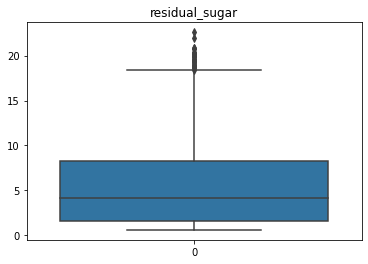

In [18]:
sns.boxplot(data=white.residual_sugar);
plt.title("residual_sugar")

Text(0.5, 1.0, 'chlorides')

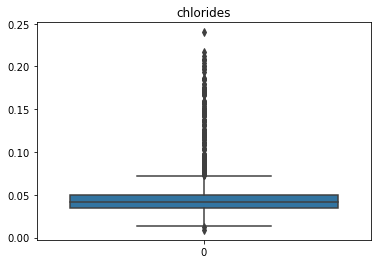

In [19]:
sns.boxplot(data=white.chlorides);
plt.title("chlorides")

Text(0.5, 1.0, 'sulphates')

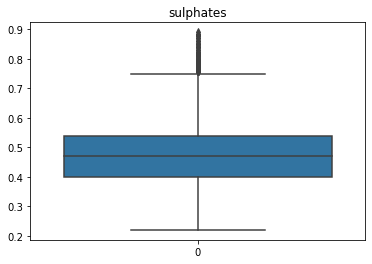

In [20]:
sns.boxplot(data=white.sulphates);
plt.title("sulphates")

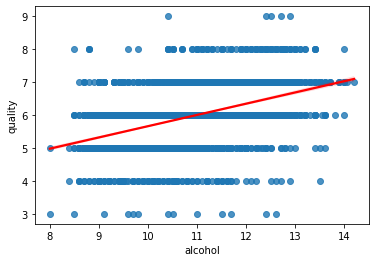

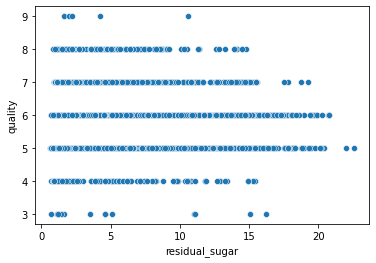

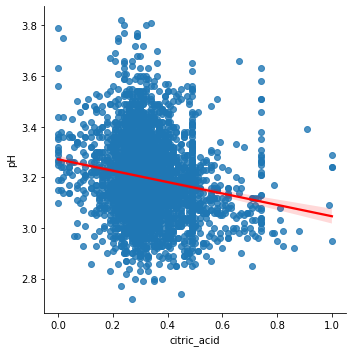

In [21]:
sns.regplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'} )
plt.show()
sns.scatterplot(data=white, x='residual_sugar', y='quality',)
plt.show()
sns.lmplot(data=white, x='citric_acid', y='pH', line_kws = {'color':'red'})
plt.show()

In [22]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

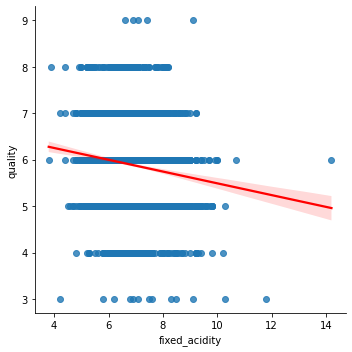

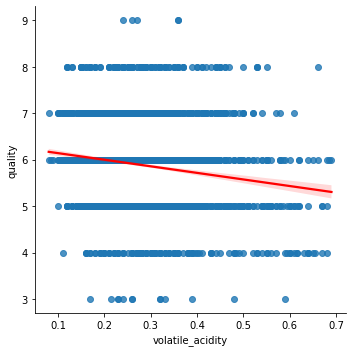

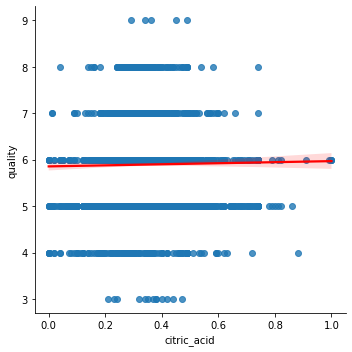

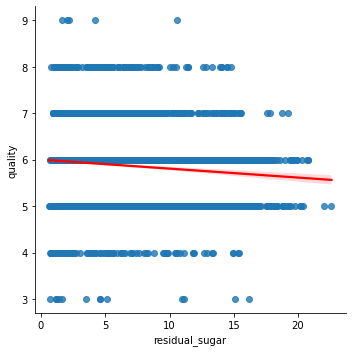

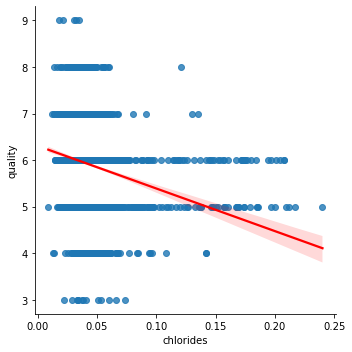

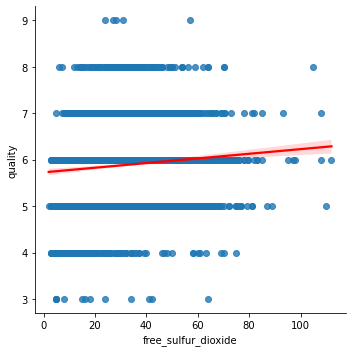

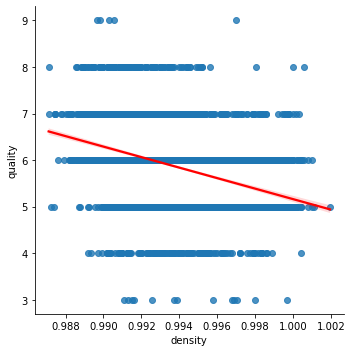

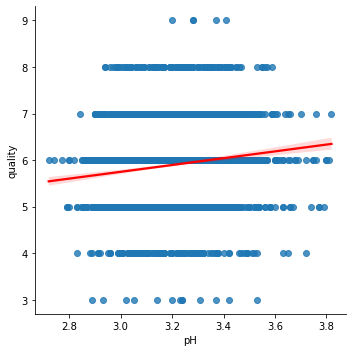

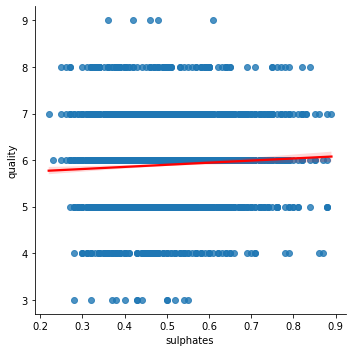

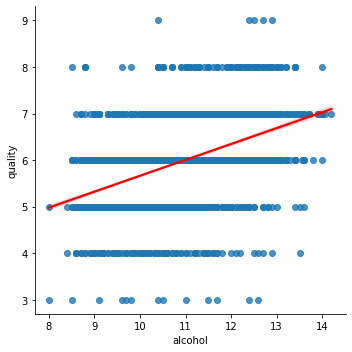

In [23]:
sns.lmplot(data=white, x='fixed_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='volatile_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='citric_acid', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='residual_sugar', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='chlorides', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='free_sulfur_dioxide', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='density', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='pH', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='sulphates', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'})
plt.show()

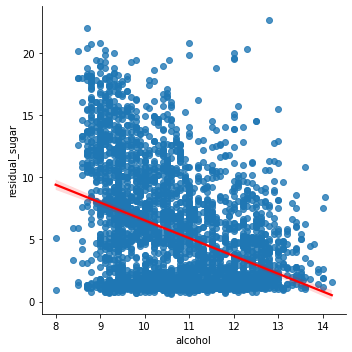

In [24]:
sns.lmplot(data=white, x='alcohol', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

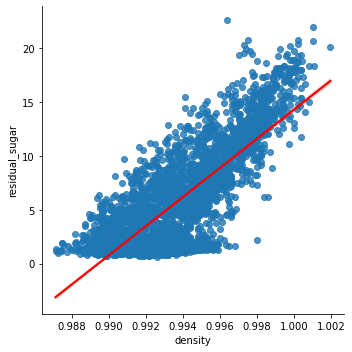

In [25]:
sns.lmplot(data=white, x='density', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

<AxesSubplot:>

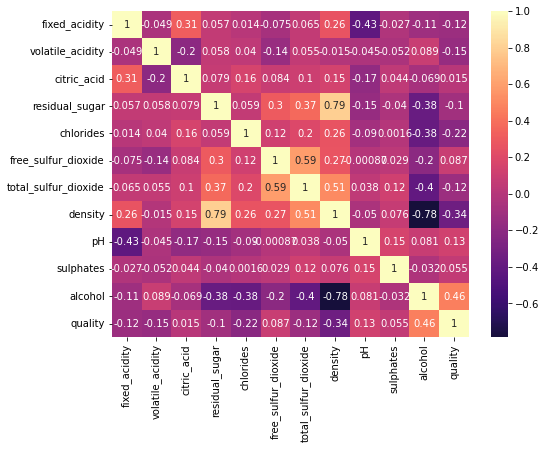

In [26]:

plt.figure(figsize=(8,6))
sns.heatmap(white.corr(), cmap='magma', center= 0, annot=True)

In [27]:
white.shape

(3600, 12)

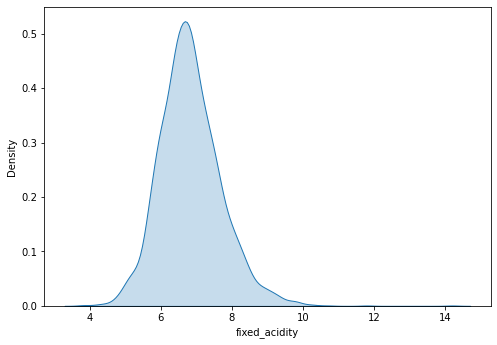

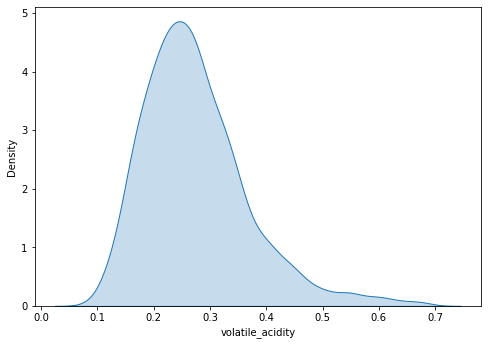

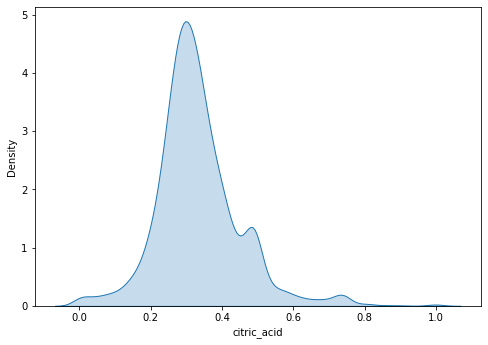

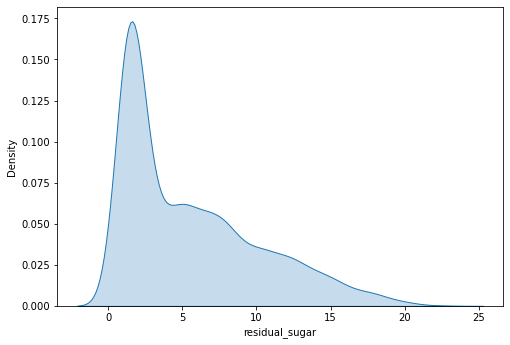

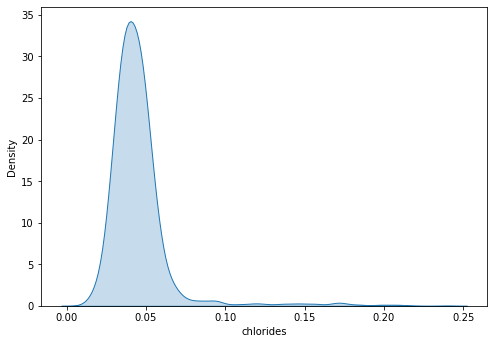

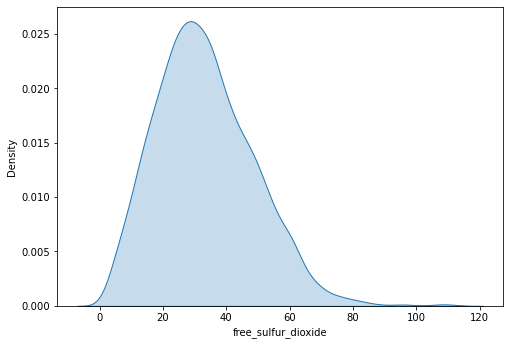

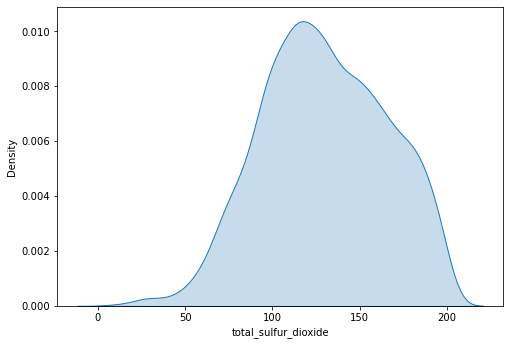

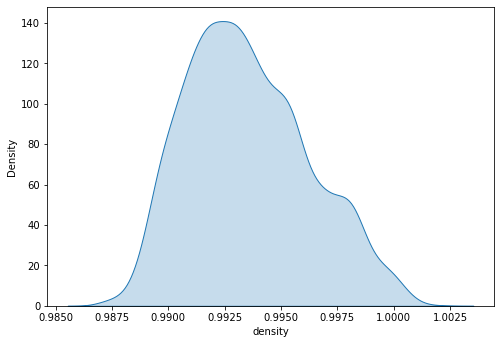

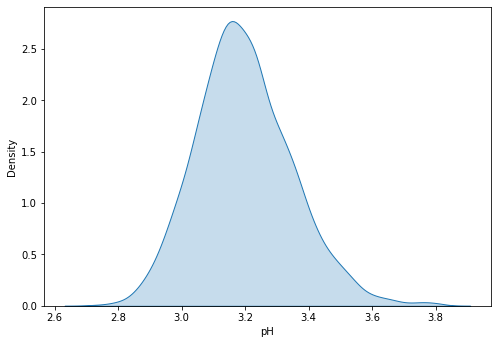

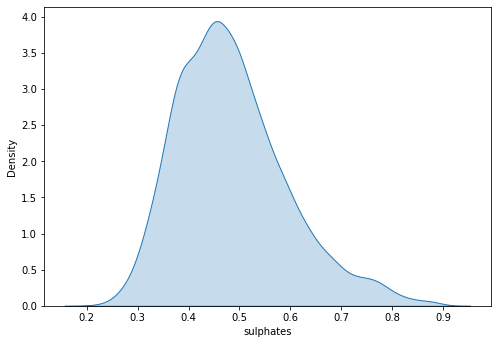

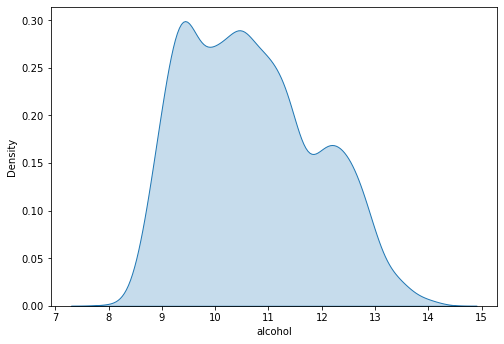

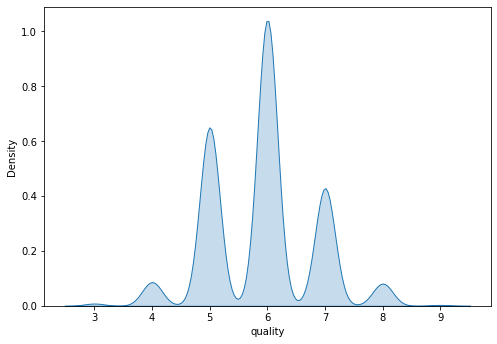

In [28]:
for col in white:
    plt.figure(figsize=[8,5.5])
    sns.kdeplot(data=white, x=col, shade=True)

In [29]:

# splitting the data into train, validate, and test
train_validate, test = train_test_split(white, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(2016, 12) (864, 12) (720, 12)


In [30]:
# setting independent/dependent variables in ea. sub-dataset

x_train = train.drop(columns=["quality"])
y_train = train.quality

x_validate = validate.drop(columns=["quality"])
y_validate = validate.quality

x_test = test.drop(columns=["quality"])
y_test = test.quality

## Question 1. Does higher acid content mean better quality white wine?
Null Hypothesis:'quality' and 'volatile_acidity' independant"

Alternate Hypothesis: Quality and volatile_acidity are related.

Alpha =0.05

In [31]:
# Calculate Pearson Correlation Coefficient for comparison

x = x_train.volatile_acidity
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

# They have a slight negative correlation. 

(-0.16590595120326984, 6.552125642461974e-14)

In [32]:
### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


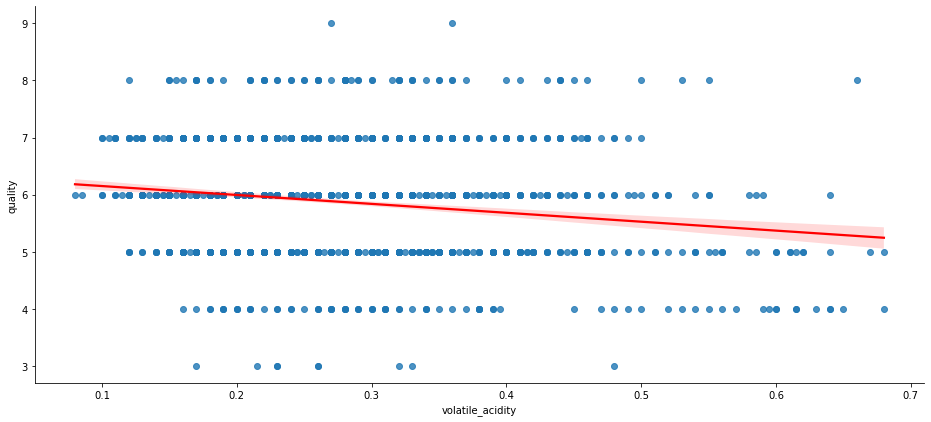

In [33]:
quality_and_volatile_acidity = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['volatile_acidity'],
                 y_vars = ['quality'])

quality_and_volatile_acidity.fig.set_size_inches(16,7)

## Question 2. How about Citric acid? Does that effect the quality?
Null Hypothesis: Citric acid and Quality are not related

Alternate Hypothesis: Quality and volatile_acidity are related.

Alpha =0.05

In [34]:
# Calculate Pearson Correlation Coefficient for comparison

x = x_train.citric_acid
y = y_train

corr, p = stats.pearsonr(x, y)
corr, p

(0.030384150020705394, 0.17265770099989286)

In [35]:
### Decide whether to reject or accept the null hypothesis

if p < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Accept Null Hypothesis


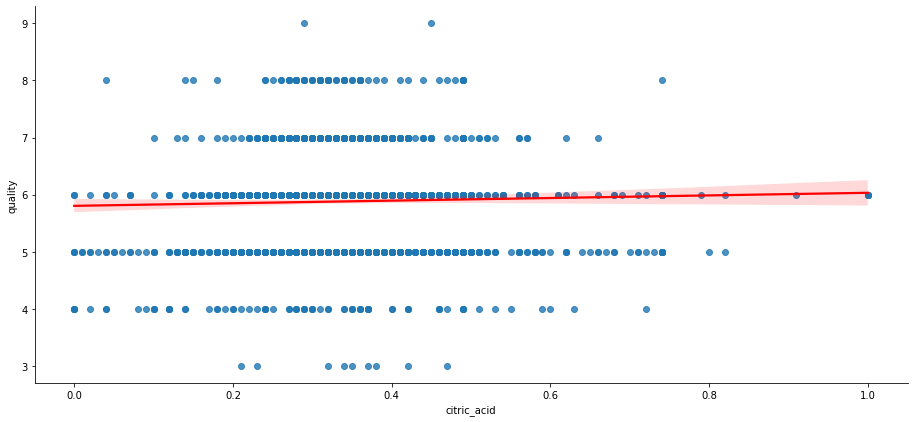

In [36]:
quality_and_citric_acid = sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}}, x_vars = ['citric_acid'],
                 y_vars = ['quality'])
quality_and_citric_acid.fig.set_size_inches(16,7)

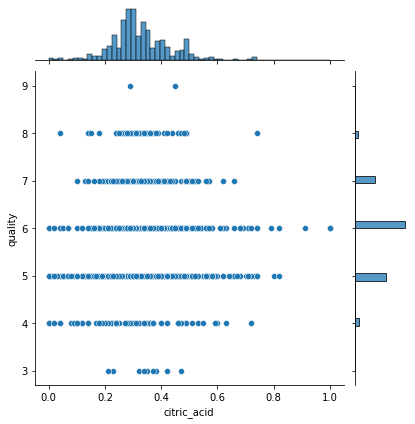

In [37]:
sns.jointplot(x="citric_acid", y="quality", data=train)
plt.xlabel("citric_acid")
plt.ylabel("quality")
plt.show()

In [38]:
print(train.quality.var())
print(train.chlorides.var())
alpha = .05

0.7942770491157634
0.0004491113070621121


In [39]:
t, p = stats.ttest_ind(train.quality, train.chlorides, equal_var=False)
t, p /2

(293.8159626305886, 0.0)

## Scaling with Min-Max

Text(0.5, 1.0, 'Scaled')

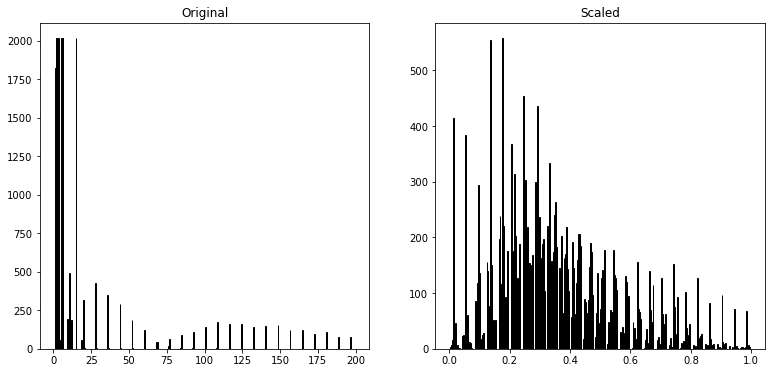

In [40]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')


## Feature Engineering

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 5 features
f_selector = SelectKBest(f_regression, k=6)

# find the top 5 X's correlated with y
f_selector.fit(x_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = x_train.iloc[:,feature_mask].columns.tolist()


In [42]:
f_feature

['fixed_acidity', 'volatile_acidity', 'chlorides', 'density', 'pH', 'alcohol']

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=6)

# fit the data using RFE
rfe.fit(x_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = x_train.iloc[:,feature_mask].columns.tolist()


In [44]:
rfe_feature

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']

In [45]:
feats = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']
scaler = helpers.prep.train_scaler(white[feats])

scaled_feats = scaler.transform(white[feats])

scaled_white = white.copy()

scaled_white[feats] = scaled_feats

In [46]:
import helpers.cluster

In [47]:
K = 5

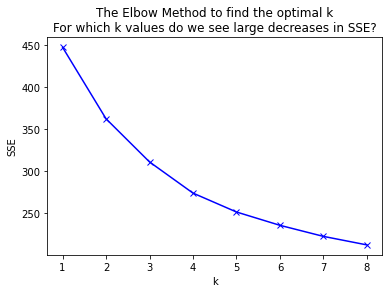

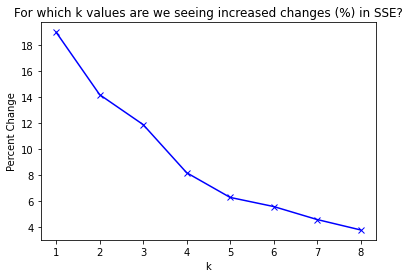

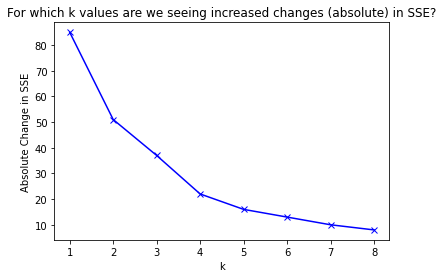

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [48]:
helpers.cluster.find_k(scaled_white, feats, range(1,10))

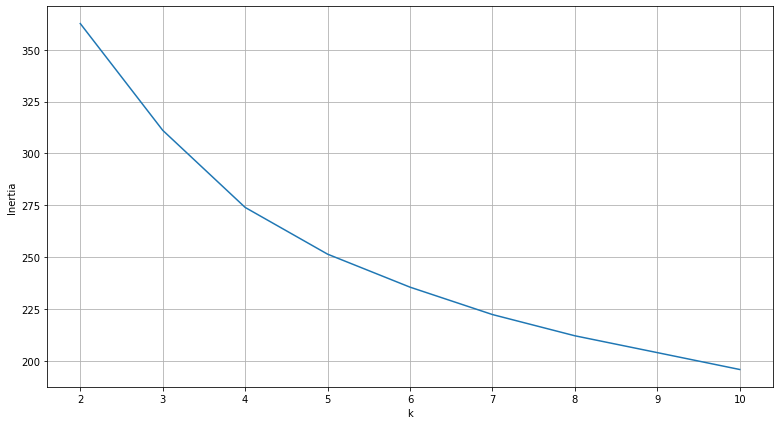

In [50]:
x_train_rfe = x_train[['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'density',
 'pH',
 'sulphates']]
inertias = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_white[feats])
    inertias[k] = kmeans.inertia_

pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(13, 7))
plt.grid()

In [51]:
kmeans = KMeans(n_clusters=3).fit(scaled_white[feats])
train['cluster_RFE'] = kmeans.predict(scaled_white[feats])
train.cluster_RFE = train.cluster_RFE.astype('category')

# means of each feature by cluster
train.groupby('cluster_RFE').mean()

ValueError: Length of values (3600) does not match length of index (2016)

In [53]:
SEED = 8

def build_kmeans_clusterer(df, cols, k, random_state=SEED):
    from sklearn.cluster import KMeans
    clusterer = KMeans(n_clusters=k, random_state=random_state)
    clusterer.fit(df[cols])
    return clusterer

((3600, 12), (2016, 12))

In [ ]:
class FlavorProfile:

    def __init__(self, **kwargs):
        defaultKwargs = {
            'features' : ['volatile_acidity','chlorides','residual_sugar','alcohol'],
            'random_state': 8,
            'k' : 4
        }
        kwargs = { **defaultKwargs, **kwargs }
        
        self.features = kwargs['features']
        self.random_state = kwargs['random_state']
        self.n_clusters = kwargs['k']
    
    def fit(self, train):
        self.train = train
        self.fit_scaler()
        self.fit_clusterer()
        return self

    def fit_scaler(self):
        self.scaler = helpers.prep.train_scaler(self.train[self.features])
        self.scaled_train = self.train.copy()
        self.scaled_train[self.features] = self.scaler.transform(self.train[self.features])

    def fit_clusterer(self):
        self.clusterer = helpers.cluster.build_kmeans_clusterer(df=self.scaled_train, cols=self.features, k=self.n_clusters, random_state=self.random_state)

    def predict(self, df):
        temp_df = df.copy()
        temp_df[self.features] = self.scaler.transform(temp_df[self.features])
        y = self.clusterer.predict(temp_df[self.features])
        return y